<a href="https://colab.research.google.com/github/Rosalesmariana/Simulacion-I-/blob/main/Metodo_Aceptacion_Rechazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Metodo de aceptación y rechazo**


Importamos las librerias necesarias



In [3]:
import numpy as np
import matplotlib.pyplot as plt

Declaramos la funcion de densidad de probabilidad

In [4]:
def fdp(x):
    return 20 * x * (1 - x) ** 3

Proponemos una funcion $g(x)$, que en este caso fue $g(x)=1$

In [5]:
# Función de propuesta
def propuesta(x):
    return 135 / 16  # Valor máximo de la funcion de densidad de probabilidad

Generamos una muestra a traves del metodo de aceptacion y rechazo de la siguiente manera

In [7]:
def aceptación_rechazo(n_muestras):
    muestras = []
    while len(muestras) < n_muestras:
        x = np.random.rand()  # Generar una muestra de x uniformemente en [0, 1]
        u = np.random.rand()  # Generar un número aleatorio entre 0 y 1
        if u <= fdp(x) / propuesta(x):
            muestras.append(x)
    return np.array(muestras)

Generar 1000 muestras utilizando el método de aceptación y rechazo


In [8]:
muestras = aceptación_rechazo(1000)

Para obtener la Funcion de distribucion acumulada lo haremos a partir de las muestras

In [10]:
def distribucion_acum(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y


Generaramos datos para la funcion de distribucion acumulada

In [11]:

x_fdc, y_fdc = distribucion_acum(muestras)

Finalmente realizamos las graficas para visualizar la funcion de densidad de probabilidad, la funcion de distribucion acumulada y el histograma de las muestras

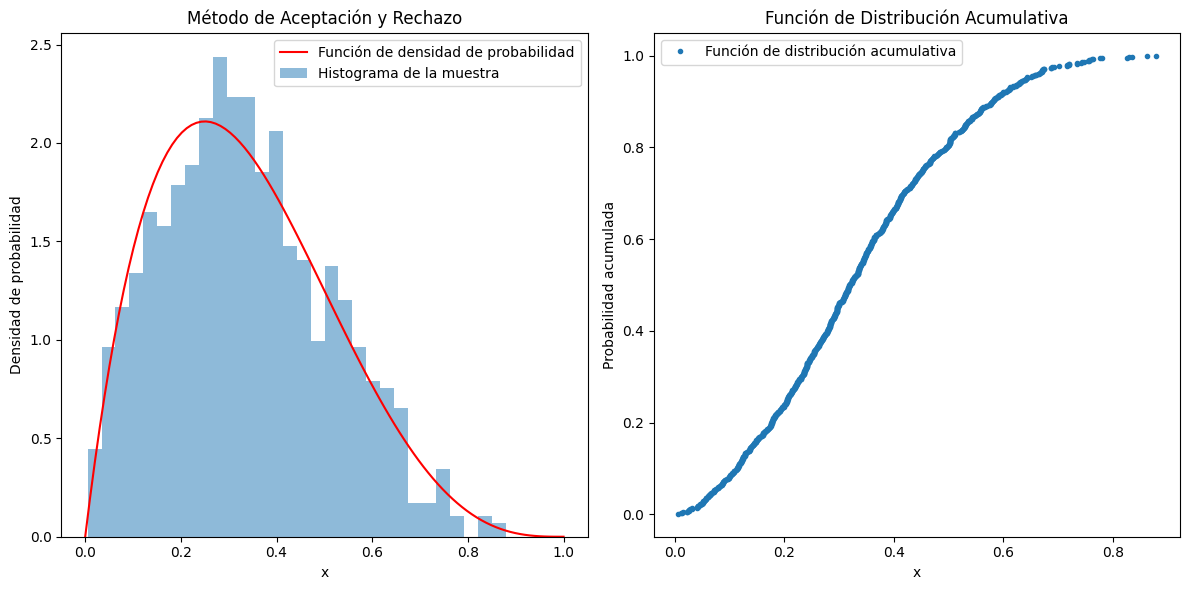

In [15]:
# Graficar las muestras generadas junto con la función de densidad de probabilidad y la funcion de distribucion acumulada
x = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 6))

# Grafica para la funcion de densidad de probabilidad e histograma
plt.subplot(1, 2, 1)
plt.plot(x, fdp(x), 'r-', label='Función de densidad de probabilidad')
plt.hist(muestras, bins=30, density=True, alpha=0.5, label='Histograma de la muestra')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.title('Método de Aceptación y Rechazo')

# Grafica para la funcion de distribucion acumulada
plt.subplot(1, 2, 2)
plt.plot(x_fdc, y_fdc, marker='.', linestyle='none', label='Función de distribución acumulativa')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.title('Función de Distribución Acumulativa')

plt.tight_layout()
plt.show()